# Pandas Note(advance)

## 案例一：TGI

TGI指数计算公式 = 目标群体中具有某一特征的群体所占比例 / 总体中具有相同特征的群体所占比例  * 标准数100

In [3]:
import pandas as pd
t = pd.read_excel('TGI指数案例数据.xlsx')
t

,品牌名称,买家昵称,付款日期,订单状态,实付金额,邮费,省份,城市,购买数量
0,viva la vida,做快淘饭,2019-04-18 00:03:00,交易成功,22.320,0,北京,北京市,1
1,viva la vida,作自有世祟,2019-02-17 00:03:51,交易成功,87.000,0,上海,上海市,1
2,viva la vida,作雪白室,2019-04-18 00:01:43,交易成功,97.660,0,福建省,福州市,2
3,viva la vida,作美女购物主,2019-01-11 23:35:01,交易成功,37.230,0,河南省,安阳市,3
4,viva la vida,作美女购物主,2019-02-18 14:16:03,交易成功,29.500,0,河南省,安阳市,2
...,...,...,...,...,...,...,...,...,...
28827,viva la vida,.托托m,2019-01-11 02:26:33,交易成功,37.475,0,上海,上海市,3
28828,viva la vida,.willn1,2019-01-11 03:46:18,交易成功,34.570,0,山东省,烟台市,2
28829,viva la vida,.christiny,2019-01-29 14:17:15,交易成功,22.000,0,江苏省,南京市,1
28830,viva la vida,.blue_ram,2019-02-04 17:49:34,交易成功,49.450,0,上海,上海市,1


In [ ]:
gp_user = t.groupby('买家昵称')['实付金额'].mean().reset_index()
gp_user

In [ ]:
def is_high(x):
    if x > 50:
        return '高客单'
    else:
        return '低客单'
    
gp_user['客单类别'] = gp_user['实付金额'].apply(is_high)
# 根据实付金额为买家打上标签

In [ ]:
# 去重
gp_dup = t.loc[t.duplicated('买家昵称') == False, :]
# gp_user.duplicated('买家昵称')函数会为重复数据的第一个打上FALSE标签，这样就可提取出所有的非重复数据
gp_dup

In [ ]:
# 将打上标签的和去重后的合并
mer_t = pd.merge(gp_dup, gp_user, left_on='买家昵称', right_on='买家昵称', how='left')
mer_t

In [ ]:
mer_t = mer_t[['买家昵称', '客单类别', '省份', '城市']]
result = pd.pivot_table(mer_t, index=['省份', '城市'], columns='客单类别', aggfunc='count')
result

In [ ]:
high = result['买家昵称']['高客单'].reset_index()
high

In [ ]:
low = result['买家昵称']['低客单'].reset_index()
low

In [ ]:
tgi = pd.merge(high, low, left_on=['省份','城市'], right_on=['省份','城市'], how='inner')
tgi

In [ ]:
tgi['总人数'] = tgi['高客单'] + tgi['低客单']
tgi['高客单占比'] = tgi['高客单'] / tgi['总人数']
tgi

In [ ]:
# 查看是否有空行
tgi.info()
# 如下表，总人数小于省份城市数

In [ ]:
tgi = tgi.dropna()       # 剔除空行
tgi

In [ ]:
tgi_total_per = tgi['高客单'].sum() / tgi['总人数'].sum()
tgi_total_per

In [ ]:
tgi.loc[:, '高客单TGI指数'] = tgi['高客单占比'] / tgi_total_per * 100
tgi = tgi.sort_values('高客单TGI指数', ascending=False)
tgi.head(10)

In [5]:
tgi.loc[:, '高客单TGI指数'] = tgi['高客单占比'] / tgi_total_per * 100
tgi = tgi.sort_values('高客单TGI指数', ascending=False)
tgi.head(10)

,买家昵称,实付金额
0,.blue_ram,49.450
1,.christiny,22.000
2,.willn1,34.570
3,.托托m,37.475
4,0000妮,13.500
...,...,...
25943,龙火师,24.500
25944,龙魔鬼女,87.000
25945,龟mil宝,25.360
25946,！谢鹏逗逼？,17.000


In [6]:
def is_high(x):
    if x > 50:
        return '高客单'
    else:
        return '低客单'
    
gp_user['客单类别'] = gp_user['实付金额'].apply(is_high)
# 根据实付金额为买家打上标签

,买家昵称,实付金额,客单类别
0,.blue_ram,49.450,低客单
1,.christiny,22.000,低客单
2,.willn1,34.570,低客单
3,.托托m,37.475,低客单
4,0000妮,13.500,低客单
...,...,...,...
25943,龙火师,24.500,低客单
25944,龙魔鬼女,87.000,高客单
25945,龟mil宝,25.360,低客单
25946,！谢鹏逗逼？,17.000,低客单


In [11]:
# 去重
gp_dup = t.loc[t.duplicated('买家昵称') == False, :]
# gp_user.duplicated('买家昵称')函数会为重复数据的第一个打上FALSE标签，这样就可提取出所有的非重复数据
gp_dup

,品牌名称,买家昵称,付款日期,订单状态,实付金额,邮费,省份,城市,购买数量
0,viva la vida,做快淘饭,2019-04-18 00:03:00,交易成功,22.320,0,北京,北京市,1
1,viva la vida,作自有世祟,2019-02-17 00:03:51,交易成功,87.000,0,上海,上海市,1
2,viva la vida,作雪白室,2019-04-18 00:01:43,交易成功,97.660,0,福建省,福州市,2
3,viva la vida,作美女购物主,2019-01-11 23:35:01,交易成功,37.230,0,河南省,安阳市,3
5,viva la vida,作卢阳口才室,2019-06-16 04:15:56,交易成功,42.500,0,浙江省,衢州市,3
...,...,...,...,...,...,...,...,...,...
28827,viva la vida,.托托m,2019-01-11 02:26:33,交易成功,37.475,0,上海,上海市,3
28828,viva la vida,.willn1,2019-01-11 03:46:18,交易成功,34.570,0,山东省,烟台市,2
28829,viva la vida,.christiny,2019-01-29 14:17:15,交易成功,22.000,0,江苏省,南京市,1
28830,viva la vida,.blue_ram,2019-02-04 17:49:34,交易成功,49.450,0,上海,上海市,1


In [12]:
# 将打上标签的和去重后的合并
mer_t = pd.merge(gp_dup, gp_user, left_on='买家昵称', right_on='买家昵称', how='left')
mer_t

,品牌名称,买家昵称,付款日期,订单状态,实付金额_x,邮费,省份,城市,购买数量,实付金额_y,客单类别
0,viva la vida,做快淘饭,2019-04-18 00:03:00,交易成功,22.320,0,北京,北京市,1,22.320,低客单
1,viva la vida,作自有世祟,2019-02-17 00:03:51,交易成功,87.000,0,上海,上海市,1,87.000,高客单
2,viva la vida,作雪白室,2019-04-18 00:01:43,交易成功,97.660,0,福建省,福州市,2,97.660,高客单
3,viva la vida,作美女购物主,2019-01-11 23:35:01,交易成功,37.230,0,河南省,安阳市,3,33.365,低客单
4,viva la vida,作卢阳口才室,2019-06-16 04:15:56,交易成功,42.500,0,浙江省,衢州市,3,42.500,低客单
...,...,...,...,...,...,...,...,...,...,...,...
25943,viva la vida,.托托m,2019-01-11 02:26:33,交易成功,37.475,0,上海,上海市,3,37.475,低客单
25944,viva la vida,.willn1,2019-01-11 03:46:18,交易成功,34.570,0,山东省,烟台市,2,34.570,低客单
25945,viva la vida,.christiny,2019-01-29 14:17:15,交易成功,22.000,0,江苏省,南京市,1,22.000,低客单
25946,viva la vida,.blue_ram,2019-02-04 17:49:34,交易成功,49.450,0,上海,上海市,1,49.450,低客单


In [15]:
mer_t = mer_t[['买家昵称', '客单类别', '省份', '城市']]
result = pd.pivot_table(mer_t, index=['省份', '城市'], columns='客单类别', aggfunc='count')
result

买家昵称        
客单类别             低客单     高客单
省份   城市                     
上海   上海市      2818.0  2374.0
云南省  临沧市         3.0     2.0
     丽江市         1.0     3.0
     保山市         6.0     2.0
     大理白族自治州     9.0     8.0
...              ...     ...
黑龙江省 绥化市        14.0     2.0
     鸡西市         6.0     3.0
     鹤岗市         1.0     2.0
     黑河市         4.0     3.0
     齐齐哈尔市      14.0    10.0

[346 rows x 2 columns]

In [19]:
high = result['买家昵称']['高客单'].reset_index()
high

,省份,城市,高客单
0,上海,上海市,2374.0
1,云南省,临沧市,2.0
2,云南省,丽江市,3.0
3,云南省,保山市,2.0
4,云南省,大理白族自治州,8.0
...,...,...,...
341,黑龙江省,绥化市,2.0
342,黑龙江省,鸡西市,3.0
343,黑龙江省,鹤岗市,2.0
344,黑龙江省,黑河市,3.0


In [20]:
low = result['买家昵称']['低客单'].reset_index()
low

,省份,城市,低客单
0,上海,上海市,2818.0
1,云南省,临沧市,3.0
2,云南省,丽江市,1.0
3,云南省,保山市,6.0
4,云南省,大理白族自治州,9.0
...,...,...,...
341,黑龙江省,绥化市,14.0
342,黑龙江省,鸡西市,6.0
343,黑龙江省,鹤岗市,1.0
344,黑龙江省,黑河市,4.0


In [27]:
tgi = pd.merge(high, low, left_on=['省份','城市'], right_on=['省份','城市'], how='inner')
tgi

,省份,城市,高客单,低客单
0,上海,上海市,2374.0,2818.0
1,云南省,临沧市,2.0,3.0
2,云南省,丽江市,3.0,1.0
3,云南省,保山市,2.0,6.0
4,云南省,大理白族自治州,8.0,9.0
...,...,...,...,...
341,黑龙江省,绥化市,2.0,14.0
342,黑龙江省,鸡西市,3.0,6.0
343,黑龙江省,鹤岗市,2.0,1.0
344,黑龙江省,黑河市,3.0,4.0


In [28]:
tgi['总人数'] = tgi['高客单'] + tgi['低客单']
tgi['高客单占比'] = tgi['高客单'] / tgi['总人数']
tgi

,省份,城市,高客单,低客单,总人数,高客单占比
0,上海,上海市,2374.0,2818.0,5192.0,0.457242
1,云南省,临沧市,2.0,3.0,5.0,0.400000
2,云南省,丽江市,3.0,1.0,4.0,0.750000
3,云南省,保山市,2.0,6.0,8.0,0.250000
4,云南省,大理白族自治州,8.0,9.0,17.0,0.470588
...,...,...,...,...,...,...
341,黑龙江省,绥化市,2.0,14.0,16.0,0.125000
342,黑龙江省,鸡西市,3.0,6.0,9.0,0.333333
343,黑龙江省,鹤岗市,2.0,1.0,3.0,0.666667
344,黑龙江省,黑河市,3.0,4.0,7.0,0.428571


In [29]:
# 查看是否有空行
tgi.info()
# 如下表，总人数小于省份城市数

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346 entries, 0 to 345
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   省份      346 non-null    object 
 1   城市      346 non-null    object 
 2   高客单     332 non-null    float64
 3   低客单     329 non-null    float64
 4   总人数     315 non-null    float64
 5   高客单占比   315 non-null    float64
dtypes: float64(4), object(2)
memory usage: 18.9+ KB


In [30]:
tgi = tgi.dropna()       # 剔除空行
tgi

,省份,城市,高客单,低客单,总人数,高客单占比
0,上海,上海市,2374.0,2818.0,5192.0,0.457242
1,云南省,临沧市,2.0,3.0,5.0,0.400000
2,云南省,丽江市,3.0,1.0,4.0,0.750000
3,云南省,保山市,2.0,6.0,8.0,0.250000
4,云南省,大理白族自治州,8.0,9.0,17.0,0.470588
...,...,...,...,...,...,...
341,黑龙江省,绥化市,2.0,14.0,16.0,0.125000
342,黑龙江省,鸡西市,3.0,6.0,9.0,0.333333
343,黑龙江省,鹤岗市,2.0,1.0,3.0,0.666667
344,黑龙江省,黑河市,3.0,4.0,7.0,0.428571


In [32]:
tgi_total_per = tgi['高客单'].sum() / tgi['总人数'].sum()
tgi_total_per

0.41528303343887557

In [37]:
tgi.loc[:, '高客单TGI指数'] = tgi['高客单占比'] / tgi_total_per * 100
tgi = tgi.sort_values('高客单TGI指数', ascending=False)
tgi.head(10)

,省份,城市,高客单,低客单,总人数,高客单占比,高客单TGI指数
149,新疆维吾尔自治区,哈密市,4.0,1.0,5.0,0.800000,192.639702
152,新疆维吾尔自治区,巴音郭楞蒙古自治州,10.0,3.0,13.0,0.769231,185.230483
2,云南省,丽江市,3.0,1.0,4.0,0.750000,180.599721
277,甘肃省,白银市,3.0,1.0,4.0,0.750000,180.599721
34,吉林省,辽源市,2.0,1.0,3.0,0.666667,160.533085
44,四川省,广安市,6.0,3.0,9.0,0.666667,160.533085
136,广西壮族自治区,河池市,4.0,2.0,6.0,0.666667,160.533085
25,内蒙古自治区,锡林郭勒盟,2.0,1.0,3.0,0.666667,160.533085
343,黑龙江省,鹤岗市,2.0,1.0,3.0,0.666667,160.533085
97,山西省,临汾市,9.0,5.0,14.0,0.642857,154.799761


## 案例二

* 总共128张表，每一份表格对应着一个细分行业的数据，像什么各类户外服装、垂钓装备、救生装备应有尽有
* 每张表，以月的维度（2018年9月-2019年8月，近一年）记录着每个品牌的日期、访客、客单、转化、所属类目（细分行业）等数据
* 共有20个品牌，这些品牌涉及到128个类目（细分行业）
* 筛选出近一年销售额总额TOP5的品牌以及对应的销售额

In [3]:
import os
import pandas as pd

### 首先打开单个文件

In [7]:
os.chdir(r'E:\pynote\data_analysis\pandas\源数据128张表格')

In [8]:
name = '垂钓装备&绑钩器.xlsx'
df = pd.read_excel(name)
df.head(5)

,日期,转化率,访客数,三级类目,客单价,品牌
0,2019-08,0.025806,221402,绑钩器,33.284283,品牌-17
1,2019-08,0.019638,14074,绑钩器,233.995330,品牌-12
2,2019-08,0.065407,75392,绑钩器,11.938785,品牌-20
3,2019-08,0.015905,85529,绑钩器,41.059966,品牌-13
4,2019-08,0.039033,23839,绑钩器,44.502008,品牌-1


In [9]:
# 我们要汇总的是各品牌近一年（2018年9月-2019年8月）的销售额，先看看日期是否正确
df['日期'].unique()

array(['2019-08', '2019-07', '2019-06', '2019-05', '2019-04', '2019-03',
       '2019-02', '2019-01', '2018-12', '2018-11', '2018-10', '2018-09'],
      dtype=object)

In [10]:
# 销售额是可以通过访客数*转化率*客单价三者的乘积来计算的
df['销售额'] = df['访客数'] * df['转化率'] * df['客单价']
df

,日期,转化率,访客数,三级类目,客单价,品牌,销售额
0,2019-08,0.025806,221402,绑钩器,33.284283,品牌-17,190167.455681
1,2019-08,0.019638,14074,绑钩器,233.995330,品牌-12,64673.807815
2,2019-08,0.065407,75392,绑钩器,11.938785,品牌-20,58871.997672
3,2019-08,0.015905,85529,绑钩器,41.059966,品牌-13,55856.842507
4,2019-08,0.039033,23839,绑钩器,44.502008,品牌-1,41409.600947
...,...,...,...,...,...,...,...
235,2018-09,0.020612,10620,绑钩器,43.028384,品牌-18,9418.930638
236,2018-09,0.047716,3570,绑钩器,42.566547,品牌-19,7251.073197
237,2018-09,0.034570,2820,绑钩器,58.662225,品牌-12,5718.808686
238,2018-09,0.017366,7020,绑钩器,46.042571,品牌-11,5613.048319


In [11]:
# 按品牌来汇总销售额，得到近一年各品牌销售额合计
df_gp = df.groupby('品牌')['销售额'].sum().reset_index()
df_gp.head(5)

,品牌,销售额
0,品牌-1,529837.745358
1,品牌-10,217976.661847
2,品牌-11,327093.079507
3,品牌-12,485635.295843
4,品牌-13,438391.195855


这里有个细节，最终小Z要汇总的是所有细分行业的销售额，对于单独行业的销售额，应该加一个区分的标签以防覆盖，而打开时候的文件名，具有天然的区分和防覆盖优势，但要注意去掉文件的后缀。

In [12]:
df_gp['行业'] = name.replace('.xlsx', '')
df_gp.head(5)

,品牌,销售额,行业
0,品牌-1,529837.745358,垂钓装备&绑钩器
1,品牌-10,217976.661847,垂钓装备&绑钩器
2,品牌-11,327093.079507,垂钓装备&绑钩器
3,品牌-12,485635.295843,垂钓装备&绑钩器
4,品牌-13,438391.195855,垂钓装备&绑钩器


### 用循环的方法处理所有的表格

In [13]:
import time
t1 = time.time()
result = pd.DataFrame()

for name in os.listdir(r'E:\OneDrive\Python\data_analyse\pandas\源数据128张表格'):
    df = pd.read_excel(name)
    df['销售额'] = df['访客数'] * df['转化率'] * df['客单价']
    df_gp = df.groupby('品牌')['销售额'].sum().reset_index()
    df_gp['行业'] = name.replace('.xlsx', '')
    result = pd.concat([result, df_gp])
    
final = result.groupby('品牌')['销售额'].sum().reset_index().sort_values('销售额', ascending=False)
final.head(5)

,品牌,销售额
15,品牌-5,1.226224e+09
8,品牌-17,1.195281e+09
2,品牌-11,1.151829e+09
4,品牌-13,1.150687e+09
3,品牌-12,1.143520e+09


In [14]:
# 默认科学计数法，设置为显示小数，保留两位，并计算处理数据总用时。
import time
t1 = time.time()
result = pd.DataFrame()

for name in os.listdir(r'E:\OneDrive\Python\data_analyse\pandas\源数据128张表格'):
    df = pd.read_excel(name)
    df['销售额'] = df['访客数'] * df['转化率'] * df['客单价']
    df_gp = df.groupby('品牌')['销售额'].sum().reset_index()
    df_gp['行业'] = name.replace('.xlsx', '')
    result = pd.concat([result, df_gp])
    
final = result.groupby('品牌')['销售额'].sum().reset_index().sort_values('销售额', ascending=False)
t2 = time.time()
t = t2 - t1
print('总用时：{}s'.format(t))
pd.set_option('display.float_format', lambda x: '%.2f' % x)
print(final.head(5))
print(final.describe())

总用时：4.494115352630615s
       品牌           销售额
15   品牌-5 1226223640.73
8   品牌-17 1195280571.60
2   品牌-11 1151829215.73
4   品牌-13 1150687029.66
3   品牌-12 1143519788.23
                销售额
count         20.00
mean  1084854125.76
std     63774592.90
min    979272391.61
25%   1050719265.66
50%   1071804742.94
75%   1118990465.22
max   1226223640.73


## 案例三

RFM，是一种用户分类、价值分析模型。R，Rencency，即每个客户有多少天没回购了，可以理解为最近一次购买到现在隔了多少天。F，Frequency，是每个客户购买了多少次。M，Monetary，代表每个客户平均购买金额，这里也可以是累计购买金额。这三个维度，是RFM模型的精髓所在，帮助我们把混杂一体的客户数据分成标准的8类，然后根据每一类用户人数占比、金额贡献等不同的特征，进行人、货、场三重匹配的精细化运营。用Python建立RFM模型，整体建模思路分为五步，分别是数据概览、数据清洗、维度打分、分值计算和客户分层。

### 数据概览

In [33]:
import pandas as pd
df = pd.read_excel('PYTHON-RFM实战数据.xlsx')
df.head(5)

,品牌名称,买家昵称,付款日期,订单状态,实付金额,邮费,省份,城市,购买数量
0,数据不吹牛,叫我李2,2019-01-01 00:17:59,交易成功,186,6,上海,上海市,1
1,数据不吹牛,0cyb1992,2019-01-01 00:59:54,交易成功,145,0,广东省,广州市,1
2,数据不吹牛,萝污萌莉,2019-01-01 07:48:48,交易成功,194,8,山东省,东营市,1
3,数据不吹牛,atblovemyy,2019-01-01 09:15:49,付款以后用户退款成功，交易自动关闭,84,0,江苏省,镇江市,1
4,数据不吹牛,小星期鱼,2019-01-01 09:59:33,付款以后用户退款成功，交易自动关闭,74,0,上海,上海市,1


### 数据清洗

In [34]:
# 剔除退款后的订单
df = df.loc[df['订单状态'] == '交易成功', :]
print('还剩%d行' % len(df))

还剩27793行


### 维度打分

维度打分关键在于构建模型所需的三个字段：R（最近一次购买距今多少天)，F（购买了多少次）以及M（平均或者累计购买金额）。首先是R值，即每个用户最后一次购买时间距今多少天。如果用户只下单过一次，用现在的日期减去付款日期即可；若是用户多次下单，需先筛选出这个用户最后一次付款的时间，再用今天减去它。

就是距离今天越近，时间也就越“大”，举个例子，2019年9月9日是要大于2019年9月1日的，因此，要拿到所有用户最近一次付款时间，只需要按买家昵称分组，再选取付款日期的最大值即可

In [35]:
r = df.groupby('买家昵称')['付款日期'].max().reset_index()
r

,买家昵称,付款日期
0,.blue_ram,2019-02-04 17:49:34.000
1,.christiny,2019-01-29 14:17:15.000
2,.willn1,2019-01-11 03:46:18.000
3,.托托m,2019-01-11 02:26:33.000
4,0000妮,2019-06-28 16:53:26.458
...,...,...
25415,龙火师,2019-04-07 08:43:00.000
25416,龙魔鬼女,2019-04-19 22:14:24.000
25417,龟mil宝,2019-06-19 04:26:30.589
25418,！谢鹏逗逼？,2019-06-06 11:14:52.000


In [36]:
r['R'] = (pd.to_datetime('2019-7-1') - r['付款日期']).dt.days
r = r[['买家昵称', 'R']]
r

,买家昵称,R
0,.blue_ram,146
1,.christiny,152
2,.willn1,170
3,.托托m,170
4,0000妮,2
...,...,...
25415,龙火师,84
25416,龙魔鬼女,72
25417,龟mil宝,11
25418,！谢鹏逗逼？,24


In [37]:
df['日期标签'] = df['付款日期'].astype(str).str[:10]
# 把单个用户一天内的订单合并
dup_f = df.groupby(['买家昵称', '日期标签'])['付款日期'].count().reset_index()
f = dup_f.groupby('买家昵称')['付款日期'].count().reset_index()
f.columns = ['买家昵称', 'F']
f

,买家昵称,F
0,.blue_ram,1
1,.christiny,1
2,.willn1,1
3,.托托m,1
4,0000妮,1
...,...,...
25415,龙火师,1
25416,龙魔鬼女,1
25417,龟mil宝,2
25418,！谢鹏逗逼？,1


In [38]:
sum_m = df.groupby('买家昵称')['实付金额'].sum().reset_index()
sum_m.columns = ['买家昵称', '支付总金额']
com_m = pd.merge(sum_m, f, left_on='买家昵称', right_on='买家昵称', how='inner')
com_m['M'] = com_m['支付总金额'] / com_m['F']
com_m.head()

,买家昵称,支付总金额,F,M
0,.blue_ram,49,1,49.0
1,.christiny,183,1,183.0
2,.willn1,34,1,34.0
3,.托托m,37,1,37.0
4,0000妮,164,1,164.0


In [39]:
com_m.drop('支付总金额', axis=1, inplace=True)
rfm = pd.merge(r, com_m, left_on='买家昵称', right_on='买家昵称', how='inner')
rfm.columns = ['买家昵称', 'R', 'F', 'M']
rfm

,买家昵称,R,F,M
0,.blue_ram,146,1,49.0
1,.christiny,152,1,183.0
2,.willn1,170,1,34.0
3,.托托m,170,1,37.0
4,0000妮,2,1,164.0
...,...,...,...,...
25415,龙火师,84,1,175.0
25416,龙魔鬼女,72,1,87.0
25417,龟mil宝,11,2,248.5
25418,！谢鹏逗逼？,24,1,137.0


### 分值计算

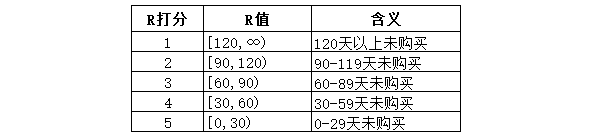
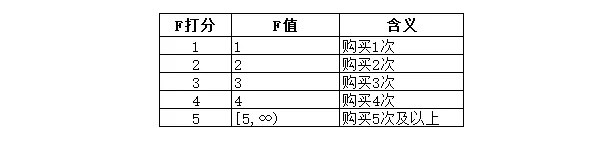
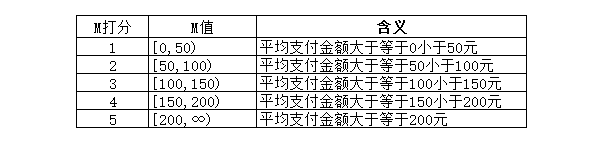

In [40]:
rfm['R_scores'] = pd.cut(x=rfm['R'], bins=[0,30,60,90,120,12000], labels=[5,4,3,2,1], right=False).astype(float)
rfm.head()

,买家昵称,R,F,M,R_scores
0,.blue_ram,146,1,49.0,1.0
1,.christiny,152,1,183.0,1.0
2,.willn1,170,1,34.0,1.0
3,.托托m,170,1,37.0,1.0
4,0000妮,2,1,164.0,5.0


In [41]:
rfm['F_scores'] = pd.cut(x=rfm['F'], bins=[1,2,3,4,5,10000], labels=[1,2,3,4,5], right=False).astype(float)     # 区间最后一个值设置的大一些提高容错率
rfm['M_scores'] = pd.cut(x=rfm['M'], bins=[0,50,100,150,200,100000], labels=[1,2,3,4,5], right=False).astype(float)
rfm

,买家昵称,R,F,M,R_scores,F_scores,M_scores
0,.blue_ram,146,1,49.0,1.0,1.0,1.0
1,.christiny,152,1,183.0,1.0,1.0,4.0
2,.willn1,170,1,34.0,1.0,1.0,1.0
3,.托托m,170,1,37.0,1.0,1.0,1.0
4,0000妮,2,1,164.0,5.0,1.0,4.0
...,...,...,...,...,...,...,...
25415,龙火师,84,1,175.0,3.0,1.0,4.0
25416,龙魔鬼女,72,1,87.0,3.0,1.0,2.0
25417,龟mil宝,11,2,248.5,5.0,2.0,5.0
25418,！谢鹏逗逼？,24,1,137.0,5.0,1.0,3.0


现在R-SCORE、F-SCORE、M-SCORE在1-5几个数之间，如果把3个值进行组合，像111，112，113...这样可以组合出125种结果，过多的分类和不分类本质是一样的。所以，我们通过判断每个客户的R、F、M值是否大于平均值，来简化分类结果。

In [42]:
# Python中判断后返回的结果是True和False，对应着数值1和0，只要把这个布尔结果乘上1，True就变成了1，False变成了0，处理之后更加易读。
rfm['R是否大于平均值'] = (rfm['R_scores'] > rfm['R_scores'].mean()) * 1
rfm['F是否大于平均值'] = (rfm['F_scores'] > rfm['F_scores'].mean()) * 1
rfm['M是否大于平均值'] = (rfm['M_scores'] > rfm['M_scores'].mean()) * 1
rfm

,买家昵称,R,F,M,R_scores,F_scores,M_scores,R是否大于平均值,F是否大于平均值,M是否大于平均值
0,.blue_ram,146,1,49.0,1.0,1.0,1.0,0,0,0
1,.christiny,152,1,183.0,1.0,1.0,4.0,0,0,1
2,.willn1,170,1,34.0,1.0,1.0,1.0,0,0,0
3,.托托m,170,1,37.0,1.0,1.0,1.0,0,0,0
4,0000妮,2,1,164.0,5.0,1.0,4.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
25415,龙火师,84,1,175.0,3.0,1.0,4.0,1,0,1
25416,龙魔鬼女,72,1,87.0,3.0,1.0,2.0,1,0,0
25417,龟mil宝,11,2,248.5,5.0,2.0,5.0,1,1,1
25418,！谢鹏逗逼？,24,1,137.0,5.0,1.0,3.0,1,0,1


### 客户分层

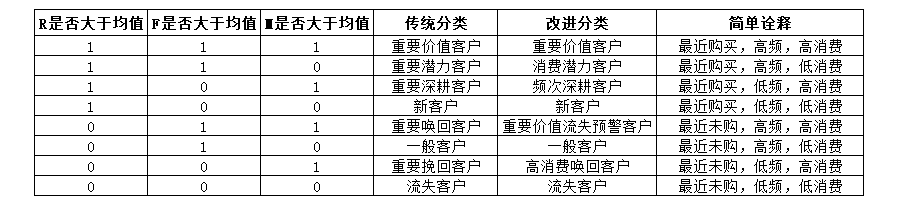

先引入一个人群数值的辅助列，把之前判断的R\F\M是否大于均值的三个值给串联起来

In [43]:
rfm['人群数值'] = rfm['R是否大于平均值'] * 100 + rfm['F是否大于平均值'] * 10 + rfm['M是否大于平均值']
rfm

,买家昵称,R,F,M,R_scores,F_scores,M_scores,R是否大于平均值,F是否大于平均值,M是否大于平均值,人群数值
0,.blue_ram,146,1,49.0,1.0,1.0,1.0,0,0,0,0
1,.christiny,152,1,183.0,1.0,1.0,4.0,0,0,1,1
2,.willn1,170,1,34.0,1.0,1.0,1.0,0,0,0,0
3,.托托m,170,1,37.0,1.0,1.0,1.0,0,0,0,0
4,0000妮,2,1,164.0,5.0,1.0,4.0,1,0,1,101
...,...,...,...,...,...,...,...,...,...,...,...
25415,龙火师,84,1,175.0,3.0,1.0,4.0,1,0,1,101
25416,龙魔鬼女,72,1,87.0,3.0,1.0,2.0,1,0,0,100
25417,龟mil宝,11,2,248.5,5.0,2.0,5.0,1,1,1,111
25418,！谢鹏逗逼？,24,1,137.0,5.0,1.0,3.0,1,0,1,101


基于人群指数给用户打标签

In [44]:
def to_labels(x):
    if x == 111:
        return '重要价值客户'
    elif x == 110:
        return '消费潜力客户'
    elif x == 101:
        return '频次深耕客户'
    elif x == 100:
        return '新客户'
    elif x == 11:
        return '重要价值流失预警客户'
    elif x == 10:
        return '一般客户'
    elif x == 1:
        return '高消费换回客户'
    elif x == 0:
        return '流失客户'
    
rfm['人群类型'] = rfm['人群数值'].apply(to_labels)
rfm

,买家昵称,R,F,M,R_scores,F_scores,M_scores,R是否大于平均值,F是否大于平均值,M是否大于平均值,人群数值,人群类型
0,.blue_ram,146,1,49.0,1.0,1.0,1.0,0,0,0,0,流失客户
1,.christiny,152,1,183.0,1.0,1.0,4.0,0,0,1,1,高消费换回客户
2,.willn1,170,1,34.0,1.0,1.0,1.0,0,0,0,0,流失客户
3,.托托m,170,1,37.0,1.0,1.0,1.0,0,0,0,0,流失客户
4,0000妮,2,1,164.0,5.0,1.0,4.0,1,0,1,101,频次深耕客户
...,...,...,...,...,...,...,...,...,...,...,...,...
25415,龙火师,84,1,175.0,3.0,1.0,4.0,1,0,1,101,频次深耕客户
25416,龙魔鬼女,72,1,87.0,3.0,1.0,2.0,1,0,0,100,新客户
25417,龟mil宝,11,2,248.5,5.0,2.0,5.0,1,1,1,111,重要价值客户
25418,！谢鹏逗逼？,24,1,137.0,5.0,1.0,3.0,1,0,1,101,频次深耕客户


### 结果分析

In [45]:
count = rfm['人群类型'].value_counts().reset_index()
count.columns = ['人群类型', '人数']
count['人数占比'] = count['人数'] / count['人数'].sum()
count

,人群类型,人数,人数占比
0,高消费换回客户,7338,0.288670
1,流失客户,6680,0.262785
2,频次深耕客户,5427,0.213493
3,新客户,4224,0.166168
4,重要价值客户,756,0.029740
5,消费潜力客户,450,0.017703
6,重要价值流失预警客户,360,0.014162
7,一般客户,185,0.007278


## 案例四

同期群分析是数据分析中一个hin经典的思维，核心是将用户按初始行为的发生时间，划分为不同的群组，进而分析相似群组的行为如何随时间变化而变化。

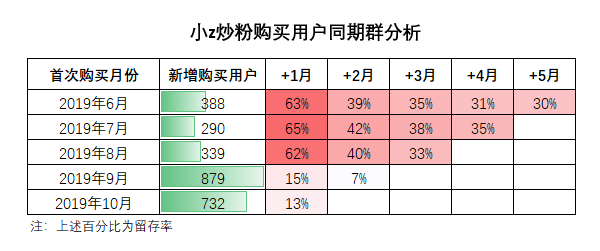

### 数据概览

In [47]:
df = pd.read_excel('同期群订单数据.xlsx')
df.head()

,平台,店铺名称,客户昵称,付款时间,订单状态,支付金额,购买数量,省份
0,线上,小z杂货铺,入倩出入深,2019-09-01 00:10:04,交易成功,15.2,1,江苏省
1,线上,小z杂货铺,愛hya爱,2019-09-01 00:14:52,交易成功,8.4,1,广东省
2,线上,小z杂货铺,象95象大,2019-09-01 02:17:15,交易成功,8.4,1,辽宁省
3,线上,小z杂货铺,卡哇伊氛十,2019-09-01 03:37:28,交易成功,22.0,1,广西壮族自治区
4,线上,小z杂货铺,一只羊哈阿,2019-09-01 08:53:50,交易成功,85.0,1,辽宁省


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42713 entries, 0 to 42712
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   平台      42713 non-null  object        
 1   店铺名称    42713 non-null  object        
 2   客户昵称    42713 non-null  object        
 3   付款时间    40339 non-null  datetime64[ns]
 4   订单状态    42713 non-null  object        
 5   支付金额    42713 non-null  float64       
 6   购买数量    42713 non-null  int64         
 7   省份      42713 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 2.6+ MB


订单共计42713行，除付款时间外，其他都是完整的（不含缺失值）。格式整体规整，付款时间为datetime格式，购买金额和数量则是数值型。

### 数据清洗

貌似，缺失付款时间的数据，订单状态主要是“交易失败”。这里做一个初步推断，之所以缺失付款时间，是因为没有产生实际交易。

In [49]:
df.loc[df['付款时间'].isnull() == False, :]['订单状态'].value_counts()

交易成功    40339
Name: 订单状态, dtype: int64

In [50]:
df.loc[df['付款时间'].isnull(), :]['订单状态'].value_counts()

交易失败    2374
Name: 订单状态, dtype: int64

果然，缺失付款时间的订单都是“交易失败”状态，而完整的数据则是“交易成功”。

In [51]:
order = df.loc[df['付款时间'].isnull() == False, :]
order

,平台,店铺名称,客户昵称,付款时间,订单状态,支付金额,购买数量,省份
0,线上,小z杂货铺,入倩出入深,2019-09-01 00:10:04,交易成功,15.2,1,江苏省
1,线上,小z杂货铺,愛hya爱,2019-09-01 00:14:52,交易成功,8.4,1,广东省
2,线上,小z杂货铺,象95象大,2019-09-01 02:17:15,交易成功,8.4,1,辽宁省
3,线上,小z杂货铺,卡哇伊氛十,2019-09-01 03:37:28,交易成功,22.0,1,广西壮族自治区
4,线上,小z杂货铺,一只羊哈阿,2019-09-01 08:53:50,交易成功,85.0,1,辽宁省
...,...,...,...,...,...,...,...,...
40334,线上,小z杂货铺,ght子竹,2020-02-29 19:13:08,交易成功,17.9,1,广东省
40335,线上,小z杂货铺,345ik,2020-02-29 19:14:33,交易成功,101.2,1,吉林省
40336,线上,小z杂货铺,099bt,2020-02-29 19:15:29,交易成功,219.3,2,广东省
40337,线上,小z杂货铺,151lw,2020-02-29 19:16:18,交易成功,101.2,1,广东省


#### 先实现单月的

In [53]:
order['时间标签']=order['付款时间'].astype(str).str[:7]
order['时间标签'].value_counts().sort_index()

<ipython-input-53-37086ae2cb83>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order['时间标签']=order['付款时间'].astype(str).str[:7]


2019-09    2201
2019-10    8096
2019-11    6050
2019-12    6760
2020-01    7443
2020-02    9789
Name: 时间标签, dtype: int64

In [54]:
month = '2019-10'
sample = order.loc[order['时间标签'] == month, :]
sample_c = sample.groupby('客户昵称')['支付金额'].sum().reset_index()
print('10月订单数', len(sample), '10月客户数', len(sample_c))

10月订单数 8096 10月客户数 7336


In [56]:
history = order.loc[order['时间标签'] == '2019-09', :]
sample_c = sample_c.loc[sample_c['客户昵称'].isin(history['客户昵称']) == False, :]
print('10月新增：', len(sample_c))

10月新增： 7083


In [62]:
re = []
for i in ['2019-11', '2019-12', '2020-01', '2020-02']:
    next_m = order.loc[order['时间标签'] == i, :]
    target_user = sample_c.loc[sample_c['客户昵称'].isin(next_m['客户昵称'])]
    re.append({i + '新增用户': len(target_user)})
re

[{'2019-11新增用户': 539},
 {'2019-12新增用户': 428},
 {'2020-01新增用户': 414},
 {'2020-02新增用户': 426}]

In [63]:
re.insert(0, {'当月新增用户': len(sample_c)})
re

[{'当月新增用户': 7083},
 {'2019-11新增用户': 539},
 {'2019-12新增用户': 428},
 {'2020-01新增用户': 414},
 {'2020-02新增用户': 426}]

#### 遍历合并

In [64]:
month_list = order['时间标签'].unique()
month_list

array(['2019-09', '2019-10', '2019-11', '2019-12', '2020-01', '2020-02'],
      dtype=object)

In [67]:
final = pd.DataFrame(index=['当月新增', '+1月', '+2月', '+3月', '+4月', '+5月'])
index = 0
for i in month_list:
    if i == '2020-02':
        break
    m = []
    sam = order.loc[order['时间标签'] == i, :]
    sam = sam.groupby('客户昵称')['支付金额'].sum().reset_index()
    if i == '2019-09':
        xz = len(sam)        # 如果是2019-09则当月新增直接是当月总客户数
    else:
        for a in month_list[:index]:
            history = order.loc[order['时间标签'] == a, :]
            sam = sam.loc[sam['客户昵称'].isin(history['客户昵称']) == False, :]
        xz = len(sam)
    m.append(xz)
    for b in month_list[index + 1:]:
        future = order.loc[order['时间标签'] == b, :]
        lc = sam.loc[sam['客户昵称'].isin(future['客户昵称']), :]
        m.append(len(lc))
    if index != 0:
        for c in range(index):
            m.append(0)
    final[i] = m
    index += 1
final
    

,2019-09,2019-10,2019-11,2019-12,2020-01
当月新增,2042,7083,4744,4983,5126
+1月,253,539,448,491,484
+2月,219,428,370,340,0
+3月,167,414,294,0,0
+4月,159,426,0,0,0
+5月,165,0,0,0,0
